# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

In [68]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [69]:
# Extracting the dataset from the source (CSV file)
df = pd.read_csv("/Users/yuti/Documents/Elevate Me/Fundamental/ML/Capstone Part 1/ecommerce_data.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [71]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Preprocessing

In [72]:
# Checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Descritpion has 1454 missing entities which can be replace by a placeholder "UNKNOWN".  
CustomerID has 135080 missing entities which represents 25 % of the total data. This can be handled by imputing the missing data with a placeholder "Guest". This would allow you to keep all transactions in the dataset, including those from guest users.

In [73]:
# Handle missing values: 
# - Fill missing 'Description' with 'Unknown'
df['Description'].fillna('Unknown', inplace=True)

In [74]:
# Impute missing 'CustomerID' with 'Guest'
df['CustomerID'].fillna('Guest', inplace=True)

# Check that missing values for 'CustomerID' are handled
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [76]:
df.duplicated().sum()

5268

In [77]:
# Remove duplicates
df = df.drop_duplicates()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  object 
 7   Country      536641 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.8+ MB


In [83]:
# Remove outliers in 'Quantity' and 'UnitPrice'
df_cleaned = df[df['Quantity'] > 0]  # Remove rows with non-positive quantities
df_cleaned = df[df['UnitPrice'] > 0]  # Remove rows with non-positive prices



In [84]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   524878 non-null  object 
 7   Country      524878 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.0+ MB


In [87]:
# Save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('cleaned_ecommerce_data_final.csv', index=False)

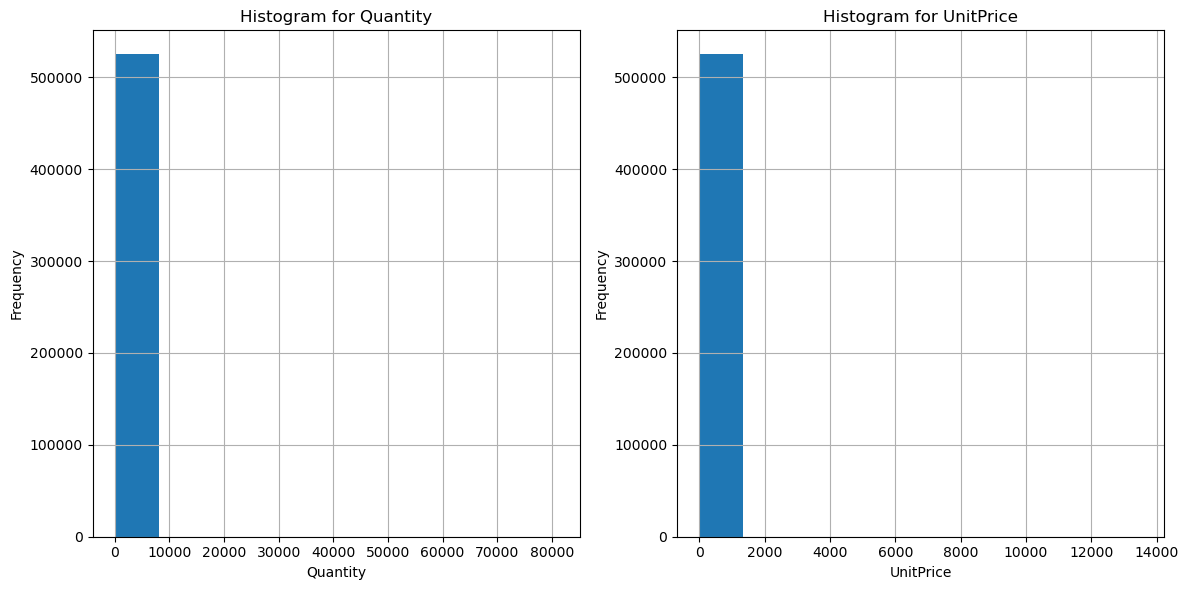

(469.54178476684893, 205.08516799804903)

In [88]:
# Check skewness numerically for 'Quantity' and 'UnitPrice' in the cleaned data
quantity_skewness_cleaned = df_cleaned['Quantity'].skew()
unitprice_skewness_cleaned = df_cleaned['UnitPrice'].skew()

# Plot histograms for visual inspection
plt.figure(figsize=(12, 6))

# Histogram for 'Quantity'
plt.subplot(1, 2, 1)
df_cleaned['Quantity'].hist(bins=10)
plt.title('Histogram for Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Histogram for 'UnitPrice'
plt.subplot(1, 2, 2)
df_cleaned['UnitPrice'].hist(bins=10)
plt.title('Histogram for UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

quantity_skewness_cleaned, unitprice_skewness_cleaned



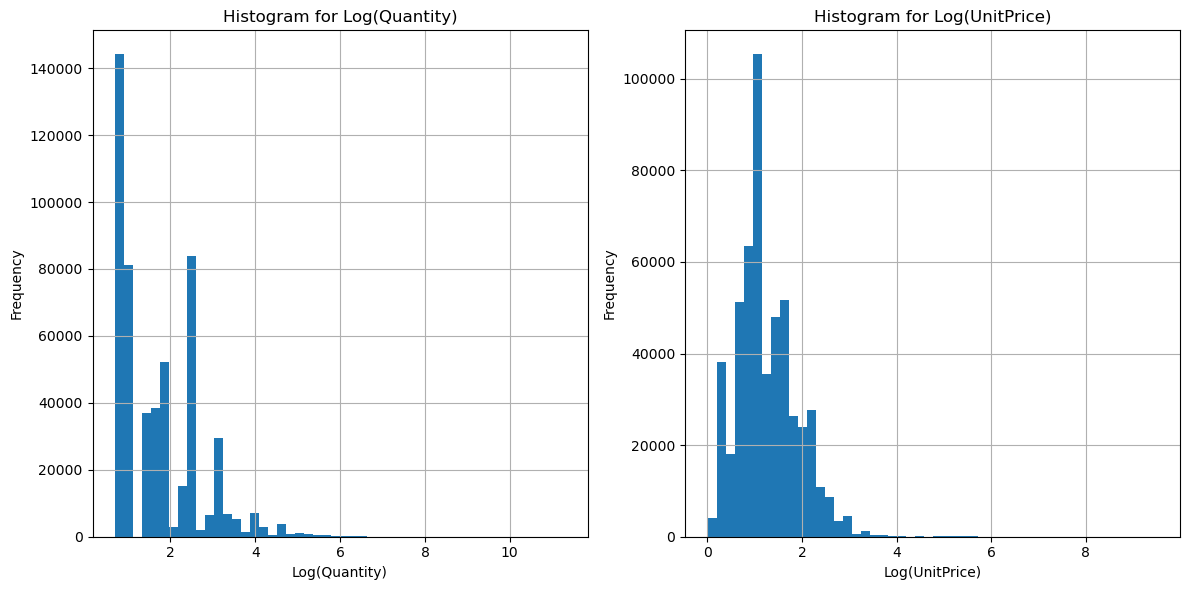

In [89]:
# Apply log transformation to 'Quantity' and 'UnitPrice' in df_cleaned
df_cleaned['Log_Quantity'] = np.log1p(df_cleaned['Quantity']) 
df_cleaned['Log_UnitPrice'] = np.log1p(df_cleaned['UnitPrice']) 

# Plot histograms of the transformed data
plt.figure(figsize=(12, 6))

# Histogram for 'Log_Quantity'
plt.subplot(1, 2, 1)
df_cleaned['Log_Quantity'].hist(bins=50)
plt.title('Histogram for Log(Quantity)')
plt.xlabel('Log(Quantity)')
plt.ylabel('Frequency')

# Histogram for 'Log_UnitPrice'
plt.subplot(1, 2, 2)
df_cleaned['Log_UnitPrice'].hist(bins=50)
plt.title('Histogram for Log(UnitPrice)')
plt.xlabel('Log(UnitPrice)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




In [92]:
# One-hot encode the 'Country' column in the cleaned dataframe (df_cleaned)
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=['Country'], drop_first=True)

# Ensure that numerical columns are in the correct data types
df_cleaned_encoded['Quantity'] = df_cleaned_encoded['Quantity'].astype(int)
df_cleaned_encoded['UnitPrice'] = df_cleaned_encoded['UnitPrice'].astype(float)
df_cleaned_encoded['Log_Quantity'] = df_cleaned_encoded['Log_Quantity'].astype(float)
df_cleaned_encoded['Log_UnitPrice'] = df_cleaned_encoded['Log_UnitPrice'].astype(float)

# Check the transformed data
df_cleaned_encoded_info = df_cleaned_encoded.info()
df_cleaned_encoded_head = df_cleaned_encoded.head()

df_cleaned_encoded_info, df_cleaned_encoded_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   InvoiceNo                     524878 non-null  object 
 1   StockCode                     524878 non-null  object 
 2   Description                   524878 non-null  object 
 3   Quantity                      524878 non-null  int64  
 4   InvoiceDate                   524878 non-null  object 
 5   UnitPrice                     524878 non-null  float64
 6   CustomerID                    524878 non-null  object 
 7   Log_Quantity                  524878 non-null  float64
 8   Log_UnitPrice                 524878 non-null  float64
 9   Country_Austria               524878 non-null  uint8  
 10  Country_Bahrain               524878 non-null  uint8  
 11  Country_Belgium               524878 non-null  uint8  
 12  Country_Brazil                524878 non-nul

(None,
   InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
       InvoiceDate  UnitPrice CustomerID  Log_Quantity  Log_UnitPrice  \
 0  12/1/2010 8:26       2.55    17850.0      1.945910       1.266948   
 1  12/1/2010 8:26       3.39    17850.0      1.945910       1.479329   
 2  12/1/2010 8:26       2.75    17850.0      2.197225       1.321756   
 3  12/1/2010 8:26       3.39    17850.0      1.945910       1.479329   
 4  12/1/2010 8:26       3.39    17850.0      1.945910       1.479329   
 
    Country_Austria  ...  Country_RSA  Country_Saudi Arabia  Country_Singapore  \
 0                0  ...       

In [95]:
df_cleaned_encoded.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Log_Quantity,Log_UnitPrice,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,1.945910,1.266948,0,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,1.945910,1.479329,0,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,2.197225,1.321756,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,1.945910,1.479329,0,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,1.945910,1.479329,0,...,0,0,0,0,0,0,0,0,1,0


# Feature Enginnering

In [97]:
# Recency: Days since the last purchase (relative to the most recent purchase)
df_cleaned_encoded['InvoiceDate'] = pd.to_datetime(df_cleaned_encoded['InvoiceDate'], infer_datetime_format=True)

most_recent_purchase_cleaned = df_cleaned_encoded['InvoiceDate'].max()
df_cleaned_encoded['Recency'] = (most_recent_purchase_cleaned - df_cleaned_encoded['InvoiceDate']).dt.days

In [98]:
# Frequency: Number of purchases per customer
frequency_cleaned = df_cleaned_encoded.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_cleaned.columns = ['CustomerID', 'Frequency']
df_cleaned_encoded = df_cleaned_encoded.merge(frequency_cleaned, on='CustomerID', how='left')


In [99]:
#Monetary: Total spend per customer (Quantity * UnitPrice)
df_cleaned_encoded['Monetary'] = df_cleaned_encoded['Quantity'] * df_cleaned_encoded['UnitPrice']



In [100]:
# Total Transaction Value: Total spent in each transaction (Quantity * UnitPrice)
df_cleaned_encoded['TotalTransactionValue'] = df_cleaned_encoded['Quantity'] * df_cleaned_encoded['UnitPrice']



In [101]:
# Average Order Value: Average amount spent per order per customer
avg_order_value_cleaned = df_cleaned_encoded.groupby('CustomerID')['TotalTransactionValue'].mean().reset_index()
avg_order_value_cleaned.columns = ['CustomerID', 'AvgOrderValue']
df_cleaned_encoded = df_cleaned_encoded.merge(avg_order_value_cleaned, on='CustomerID', how='left')


In [103]:
df_cleaned_encoded.describe()

,Quantity,UnitPrice,Log_Quantity,Log_UnitPrice,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,...,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Recency,Frequency,Monetary,TotalTransactionValue,AvgOrderValue
count,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,...,524878.000000,524878.000000,524878.000000,524878.00000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,1.717316,1.241810,0.000758,0.000034,0.003869,0.000061,0.000288,0.001423,...,0.003730,0.000341,0.000130,0.91447,0.000842,157.323134,373.684612,20.275399,20.275399,20.275399
std,156.280031,36.093028,0.989671,0.644778,0.027526,0.005856,0.062085,0.007808,0.016959,0.037698,...,0.060963,0.018464,0.011381,0.27967,0.029007,115.842046,612.548778,271.693566,271.693566,179.206762
min,1.000000,0.001000,0.693147,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.001000,0.001000,2.136970
25%,1.000000,1.250000,0.693147,0.810930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,51.000000,4.000000,3.900000,3.900000,9.243395
50%,4.000000,2.080000,1.609438,1.124930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,142.000000,11.000000,9.920000,9.920000,13.276004
75%,11.000000,4.130000,2.484907,1.635106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,256.000000,1428.000000,17.700000,17.700000,19.170722
max,80995.000000,13541.330000,11.302155,9.513576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,373.000000,1428.000000,168469.600000,168469.600000,77183.600000


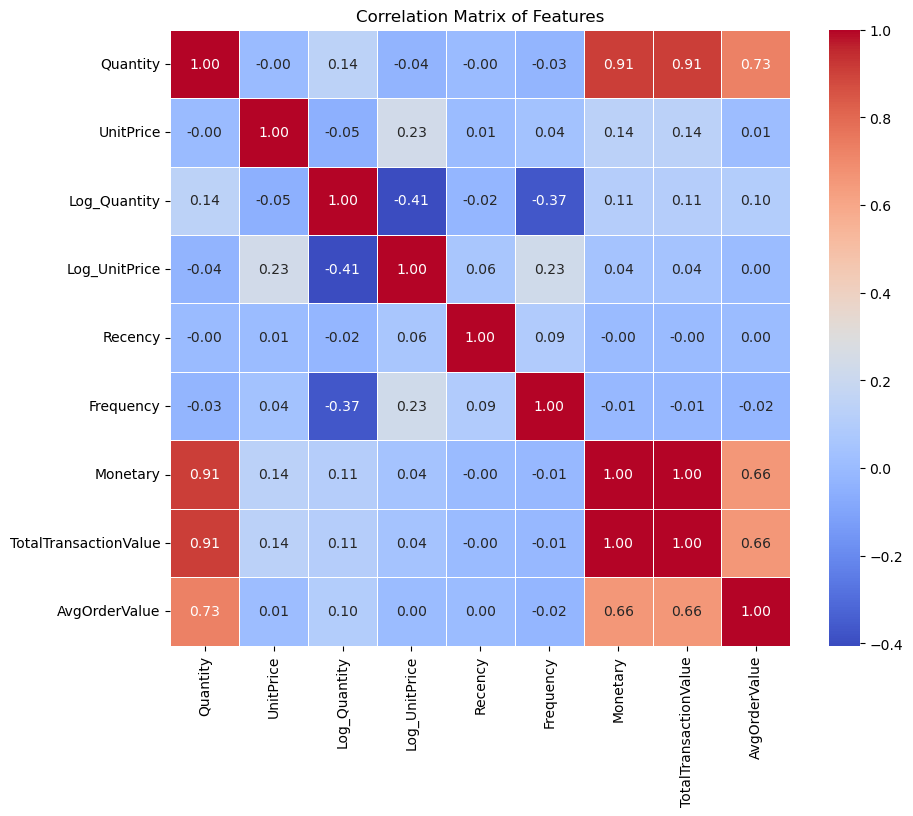

,Quantity,UnitPrice,Log_Quantity,Log_UnitPrice,Recency,Frequency,Monetary,TotalTransactionValue,AvgOrderValue
Quantity,1.000000,-0.003788,0.143035,-0.036969,-0.000783,-0.027189,0.907402,0.907402,0.729575
UnitPrice,-0.003788,1.000000,-0.050386,0.234088,0.005987,0.038058,0.137381,0.137381,0.007922
Log_Quantity,0.143035,-0.050386,1.000000,-0.405138,-0.024694,-0.370033,0.109883,0.109883,0.100214
Log_UnitPrice,-0.036969,0.234088,-0.405138,1.000000,0.056886,0.228327,0.041055,0.041055,0.002355
Recency,-0.000783,0.005987,-0.024694,0.056886,1.000000,0.090702,-0.000444,-0.000444,0.004240
Frequency,-0.027189,0.038058,-0.370033,0.228327,0.090702,1.000000,-0.014504,-0.014504,-0.021990
Monetary,0.907402,0.137381,0.109883,0.041055,-0.000444,-0.014504,1.000000,1.000000,0.659591
TotalTransactionValue,0.907402,0.137381,0.109883,0.041055,-0.000444,-0.014504,1.000000,1.000000,0.659591
AvgOrderValue,0.729575,0.007922,0.100214,0.002355,0.004240,-0.021990,0.659591,0.659591,1.000000


In [108]:
# Re-import the seaborn library
import seaborn as sns

# EDA - Correlation Matrix
correlation_matrix_cleaned_encoded = df_cleaned_encoded[['Quantity', 'UnitPrice', 'Log_Quantity', 'Log_UnitPrice', 'Recency', 'Frequency', 'Monetary', 'TotalTransactionValue', 'AvgOrderValue']].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned_encoded, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

correlation_matrix_cleaned_encoded

Quantity and Monetary have a strong positive correlation (0.91), meaning customers who buy more items tend to spend more.